In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-57.38986872699725, 116.00376363593614),
 (84.1332684709983, 102.0705541056767),
 (15.558868097093935, -81.93304326611735),
 (79.75541555904115, -135.50549521453019),
 (-57.21769342001119, -28.61516608631348),
 (42.29144097545628, 26.64908488514672),
 (-19.7501289592185, 88.85913381102029),
 (55.10059475076494, -176.0494566218564),
 (-1.8659891286152401, 168.52536069744866),
 (88.4047496461757, -90.10274212597106),
 (50.04445047708066, 16.175399222705863),
 (-70.12843268100454, -48.135379874818284),
 (22.377318565940698, -27.51897027944861),
 (-66.23839770726724, 172.77964267047457),
 (37.664706369773654, 5.526862855731423),
 (-82.60597414963556, -23.063946531018644),
 (35.23377428119238, -134.09787997595598),
 (-17.514819724338423, -158.42113838397245),
 (-43.120656224601575, 168.97983600387437),
 (74.47664464971322, -94.58055234622451),
 (79.70113828044003, -133.1180739796522),
 (-40.54132250558468, -43.18592443406965),
 (-73.42987676110687, 40.535557654364965),
 (7.492578779029031

In [4]:
# import citypy module
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | iralaya
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | elhovo
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | chocen
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | timizart
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | wanaka
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | rio grande
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | nicoya
Processing Record 23 of Set

Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | gazli
Processing Record 41 of Set 4 | pawak
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | betare oya
Processing Record 44 of Set 4 | namtsy
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | kloulklubed
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | atambua
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | san angelo
Processing Record 4 of Set 5 | yara
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | fairbanks
Processing Record 10 of Set 5 | nanortalik
Processing Record 11 of Set 5 | ucluelet
Pro

Processing Record 30 of Set 8 | uusikaupunki
Processing Record 31 of Set 8 | tawzar
City not found. Skipping...
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | tutoia
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | tiksi
Processing Record 36 of Set 8 | paka
Processing Record 37 of Set 8 | venado tuerto
Processing Record 38 of Set 8 | port moresby
Processing Record 39 of Set 8 | aripuana
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | impfondo
Processing Record 42 of Set 8 | kathu
Processing Record 43 of Set 8 | gayny
Processing Record 44 of Set 8 | tsirguliina
Processing Record 45 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 8 | callaway
Processing Record 47 of Set 8 | olinda
Processing Record 48 of Set 8 | lenger
Processing Record 49 of Set 8 | gorontalo
Processing Record 50 of Set 8 | lakes entrance
Processing Record 1 of Set 9 | gracias
Pr

Processing Record 18 of Set 12 | palaia fokaia
Processing Record 19 of Set 12 | shush
Processing Record 20 of Set 12 | bathsheba
Processing Record 21 of Set 12 | anloga
Processing Record 22 of Set 12 | aksaray
Processing Record 23 of Set 12 | juarez
Processing Record 24 of Set 12 | kabalo
Processing Record 25 of Set 12 | elat
Processing Record 26 of Set 12 | pokhara
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | ko samui
Processing Record 29 of Set 12 | gamba
Processing Record 30 of Set 12 | inongo
Processing Record 31 of Set 12 | waycross
Processing Record 32 of Set 12 | hami
Processing Record 33 of Set 12 | oranmore
Processing Record 34 of Set 12 | pimentel
Processing Record 35 of Set 12 | tiarei
Processing Record 36 of Set 12 | vucje
Processing Record 37 of Set 12 | westport
Processing Record 38 of Set 12 | inta
Processing Record 39 of Set 12 | oudtshoorn
Processing Record 40 of Set 12 | astana
Processing Record 41 of Set 12 | roseburg
Processing Record 4

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,65.32,92,100,1.97,US,2021-06-02 23:07:31
1,Khatanga,71.9667,102.5000,35.24,75,86,0.72,RU,2021-06-02 23:11:10
2,Iralaya,15.0000,-83.2333,82.53,73,17,9.06,HN,2021-06-02 23:11:11
3,Tuktoyaktuk,69.4541,-133.0374,37.13,71,89,10.09,CA,2021-06-02 23:11:11
4,Chuy,-33.6971,-53.4616,50.90,75,49,8.41,UY,2021-06-02 23:11:11
5,Elhovo,42.1667,26.5667,54.16,92,97,1.92,BG,2021-06-02 23:11:12
6,Bengkulu,-3.8004,102.2655,76.60,84,63,4.54,ID,2021-06-02 23:11:12
7,Provideniya,64.3833,-173.3000,33.91,69,20,13.42,RU,2021-06-02 23:11:12
8,Qaanaaq,77.4840,-69.3632,27.05,85,99,3.38,GL,2021-06-02 23:11:13
9,Chocen,50.0016,16.2230,55.35,71,38,6.06,CZ,2021-06-02 23:11:13


In [8]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ['City','Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-02 23:07:31,42.6001,-73.9662,65.32,92,100,1.97
1,Khatanga,RU,2021-06-02 23:11:10,71.9667,102.5000,35.24,75,86,0.72
2,Iralaya,HN,2021-06-02 23:11:11,15.0000,-83.2333,82.53,73,17,9.06
3,Tuktoyaktuk,CA,2021-06-02 23:11:11,69.4541,-133.0374,37.13,71,89,10.09
4,Chuy,UY,2021-06-02 23:11:11,-33.6971,-53.4616,50.90,75,49,8.41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

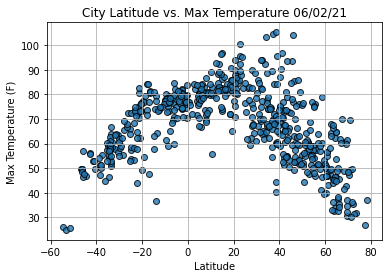

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

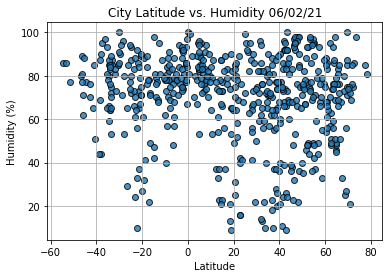

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

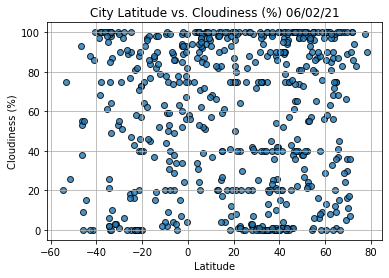

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

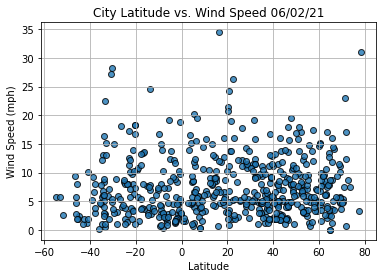

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()